In [7]:
import os
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats

from scipy.interpolate import griddata

NOTEBOOK_PATH = os.path.dirname(os.path.realpath("__file__"))

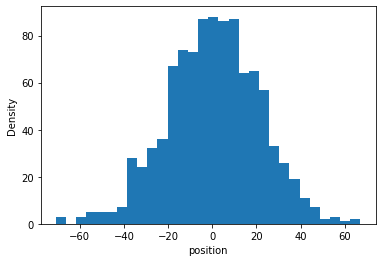

<AxesSubplot:>

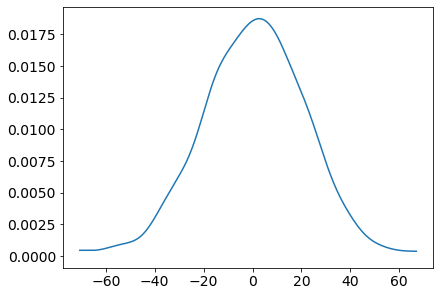

In [2]:
pos = np.random.uniform(-1, 1, size=(1280, 1000)).sum(0)

plt.xlabel('position')
plt.ylabel('Density');

plt.hist(pos, bins=30)
plt.show()

az.plot_kde(pos)

In [3]:
print(np.shape(np.random.uniform(-1, 1, size=(16, 1000))))
print(np.shape(pos))

(16, 1000)
(1000,)


In [9]:
d = pd.read_csv(os.path.join(NOTEBOOK_PATH, 'Howell1.csv'), sep=';', header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [10]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

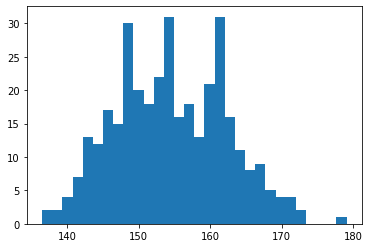

In [14]:
d2 = d[d.age >= 18]

plt.hist(d2.height, bins=30)
plt.show()

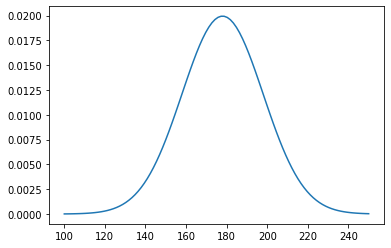

In [15]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

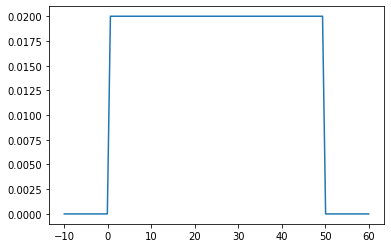

In [16]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

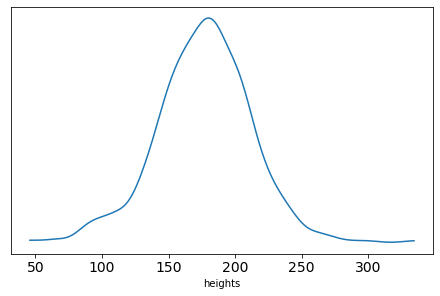

In [21]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel('heights')
plt.yticks([]);

/Users/marc/src/statrethinking/.venv/lib/python3.7/site-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
/Users/marc/src/statrethinking/.venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/marc/src/statrethinking/.venv/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/Users/marc/src/statrethinking/.venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,154.61,0.41,153.88,155.41,0.01,0.0,3569.0,3569.0,3570.0,2428.0,1.0
sigma,7.77,0.30,7.18,8.30,0.00,0.0,4082.0,4065.0,4104.0,3215.0,1.0


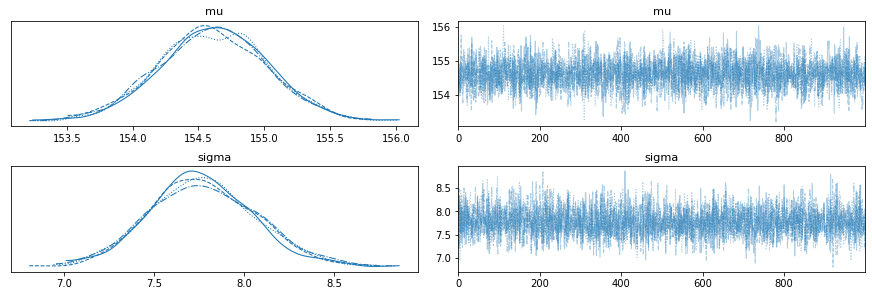

In [27]:
d = pd.read_csv(os.path.join(NOTEBOOK_PATH, 'Howell1.csv'), sep=';', header=0)
d2 = d[d.age >= 18]

with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    

with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

az.plot_trace(trace_4_1); # this function let you check the samples values

az.summary(trace_4_1, credible_interval=.89).round(2)

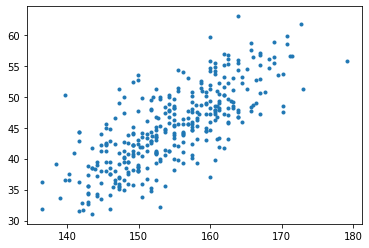

In [28]:
plt.plot(d2.height, d2.weight, '.');